# 第2章 関数近似（補間）

教科書第2章に載っているアルゴリズムを実装していきます。

## 各種ライブラリのインポート・後で使う汎用関数を定義

In [1]:
#!/usr/bin/python
#-*- encoding: utf-8 -*-
"""
Copyright (c) 2015 @myuuuuun
https://github.com/myuuuuun/NumericalCalculation

This software is released under the MIT License.
"""
%matplotlib inline
from __future__ import division, print_function
import math
import numpy as np
import functools
import sys
import types
import matplotlib.pyplot as plt
EPSIRON = 1.0e-8


"""
係数行列[a_0, a_1, ..., a_n] から、n次多項式 a_0 + a_1 * x + ... + a_n * x^n
を生成して返す（関数を返す）
"""
def make_polynomial(a_matrix):
    def __func__(x):
        f = 0
        for n, a_i in enumerate(a_matrix):
            f += a_i * pow(x, n)

        return f

    return __func__


"""
グラフを描画し、その上に元々与えられていた点列を重ねてプロットする

INPUT:
points: 与えられた点列のリスト[[x_0, f_0], [x_1, f_1], ..., [x_n, f_n]]
x_list: 近似曲線を描写するxの範囲・密度
f_list: 上のxに対応するfの値
"""
def points_on_func(points, x_list, f_list, **kwargs):
    title = kwargs.get('title', "Given Points and Interpolation Curve")
    xlim = kwargs.get('xlim', False)
    ylim = kwargs.get('ylim', False)
    
    fig, ax = plt.subplots()
    plt.title(title)

    plt.plot(x_list, f_list, color='b', linewidth=1, label="Interpolation Curve")

    points_x = [point[0] for point in points]
    points_y = [point[1] for point in points]
    plt.plot(points_x, points_y, 'o', color='r', label="Given Points")
    
    plt.xlabel("x")
    plt.ylabel("f")
    if xlim:
        ax.set_xlim(xlim)
    
    if ylim:
        ax.set_ylim(ylim)
    plt.legend()
    plt.show()

## 式(2.5)の実装
n+1個の点列を入力し、逆行列を解いて、補間多項式を求め、n次補間多項式の係数行列[a_0, a_1, ..., a_n]を返す

INPUT  
points: n+1個の点列[[x_0, f_0], [x_1, f_1], ..., [x_n, f_n]]

OUTPUT  
n次補間多項式の係数行列[a_0, a_1, ..., a_n]を返す

In [5]:
def lagrange(points):
    # 次元数
    dim = len(points) - 1

    # matrix Xをもとめる（ヴァンデルモンドの行列式）
    x_matrix = np.array([[pow(point[0], j) for j in range(dim + 1)] for point in points])

    # matrix Fをもとめる
    f_matrix = np.array([point[1] for point in points])
    
    # 線形方程式 X * A = F を解く
    a_matrix = np.linalg.solve(x_matrix, f_matrix)

    return a_matrix

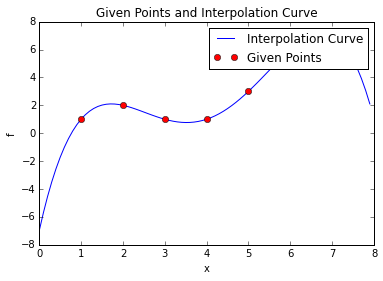

In [6]:
# lagrange()で求めた補間多項式と、元の点列をプロットしてみる
# 与えられた点列のリスト
points = [[1, 1], [2, 2], [3, 1], [4, 1], [5, 3]]

# ラグランジュの補間多項式の係数行列を求める
a_matrix = lagrange(points)

# 係数行列を多項式に変換
func_lagrange = make_polynomial(a_matrix)

# 0から8まで、0.1刻みでxとfの値のセットを求める
x_list = np.arange(0, 8, 0.1)
f_list = func_lagrange(x_list)

# プロットする
points_on_func(points, x_list, f_list)

## 式(2.7)の実装

補間多項式を変形した式から、逆行列の計算をすることなく、ラグランジュの補間多項式を求める  
ただし、今回は補間多項式の係数行列を返すのではなく、具体的なxの値のリストに対して、補間値のリストを生成して返す

INPUT  
points: 与えられた点列を入力  
x_list: 補間値を求めたいxのリストを入力

OUTPUT  
f_list: x_listの各要素に対する補間値のリスト

In [7]:
def lagrange2(points, x_list=np.arange(-5, 5, 0.1)):
    dim = len(points) - 1

    f_list = []
    for x in x_list:
        L = 0
        for i in range(dim + 1):
            Li = 1
            for j in range(dim + 1):
                if j != i:
                    Li *= (x - points[j][0]) / (points[i][0] - points[j][0])

            Li *= points[i][1]
            L += Li

        f_list.append(L)

    return f_list

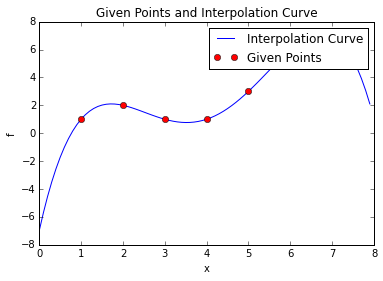

In [11]:
points = [[1, 1], [2, 2], [3, 1], [4, 1], [5, 3]]
a_matrix = lagrange2(points, np.arange(0, 8, 0.1))
points_on_func(points, np.arange(0, 8, 0.1), a_matrix)